### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,LeaveOneOut

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Importing Dataset

In [2]:
df_root = pd.read_excel("Dry_Bean_Dataset.xlsx")
df_root.head(2)

Bean ID   Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0        1  28395    610.291       208.178117       173.888747      1.197191   
1        2  28734    638.018       200.524796       182.734419      1.097356   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER

### Exploratory Data Analysis

#### Initial

In [3]:
df_root.describe()

Bean ID           Area     Perimeter  MajorAxisLength  \
count  13611.000000   13611.000000  13611.000000     13609.000000   
mean    6806.000000   53048.284549    855.283459       320.155372   
std     3929.301592   29324.095717    214.289696        85.693199   
min        1.000000   20420.000000    524.736000       183.601165   
25%     3403.500000   36328.000000    703.523500       253.319280   
50%     6806.000000   44652.000000    794.941000       296.899313   
75%    10208.500000   61332.000000    977.213000       376.497678   
max    13611.000000  254616.000000   1985.370000       738.860154   

       MinorAxisLength  AspectRation  Eccentricity     ConvexArea  \
count     13608.000000  13610.000000  13609.000000   13611.000000   
mean        202.273996      1.583268      0.750930   53768.200206   
std          44.974478      0.246669      0.091962   29774.915817   
min         122.512653      1.024868      0.218951   20684.000000   
25%         175.840519      1.432352      0.715953   36714.500000   
50%         192.443880      1.551132      0.764446   45178.000000   
75%         217.036082      1.707118      0.810471   62294.000000   
max         460.198497      2.430306      0.911423  263261.000000   

       EquivDiameter        Extent      Solidity     roundness   Compactness  \
count   13611.000000  13611.000000  13608.000000  13611.000000  13607.000000   
mean      253.064220      0.749733      0.987142      0.873282      0.799830   
std        59.177120      0.049086      0.004661      0.059520      0.061691   
min       161.243764      0.555315      0.919246      0.489618      0.640577   
25%       215.068003      0.718634      0.985670      0.832096      0.762444   
50%       238.438026      0.759859      0.988283      0.883157      0.801227   
75%       279.446467      0.786851      0.990013      0.916869      0.834234   
max       569.374358      0.866195      0.994677      0.990685      0.987303   

       ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
count  13607.000000  13609.000000  13611.000000  13611.000000  
mean       0.006564      0.001716      0.643590      0.995063  
std        0.001128      0.000596      0.098996      0.004366  
min        0.002778      0.000564      0.410339      0.947687  
25%        0.005900      0.001153      0.581359      0.993703  
50%        0.006645      0.001694      0.642044      0.996386  
75%        0.007272      0.002170      0.696006      0.997883  
max        0.010451      0.003665      0.974767      0.999733

In [4]:
df_root.dtypes

Bean ID              int64
Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

<b>Continuous to Categorical Classification problem</b>

In [5]:
df_missing = df_root.copy()
set(df_missing.Class)

{'BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'}

<b>Checking balance of the Data with respect to Target Feature</b>

<AxesSubplot:>

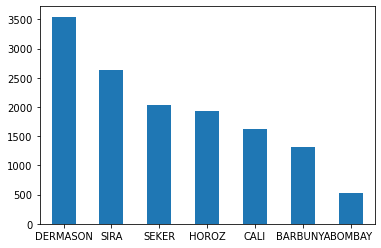

In [6]:
count_class = pd.value_counts(df_root["Class"],sort = True)
count_class.plot(kind='bar',rot = 0)

Its is multiclass classification problem with bombay class having lesser data.

<b>Looking for duplicate rows</b>

In [7]:
df_root[df_root.duplicated()]

Empty DataFrame
Columns: [Bean ID, Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, ConvexArea, EquivDiameter, Extent, Solidity, roundness, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3, ShapeFactor4, Class]
Index: []

#### Correlational Analysis

In [8]:
df_tmp = df_root.drop(columns=['Bean ID'])
df_root.corr()

Bean ID      Area  Perimeter  MajorAxisLength  \
Bean ID          1.000000 -0.369273  -0.411175        -0.325045   
Area            -0.369273  1.000000   0.966722         0.931836   
Perimeter       -0.411175  0.966722   1.000000         0.977337   
MajorAxisLength -0.325045  0.931836   0.977337         1.000000   
MinorAxisLength -0.503044  0.951615   0.913217         0.826119   
AspectRation     0.139316  0.241692   0.385228         0.550200   
Eccentricity     0.307748  0.267351   0.390915         0.541746   
ConvexArea      -0.369615  0.999939   0.967689         0.932609   
EquivDiameter   -0.418614  0.984968   0.991380         0.961732   
Extent          -0.099929  0.054345  -0.021160        -0.077982   
Solidity         0.087452 -0.196511  -0.303887        -0.284203   
roundness        0.115936 -0.357530  -0.547647        -0.596303   
Compactness     -0.200357 -0.267840  -0.406618        -0.568118   
ShapeFactor1     0.602935 -0.847983  -0.864671        -0.773699   
ShapeFactor2     0.074558 -0.639305  -0.767606        -0.859237   
ShapeFactor3    -0.223753 -0.272145  -0.408435        -0.568093   
ShapeFactor4     0.058103 -0.355721  -0.429310        -0.482477   

                 MinorAxisLength  AspectRation  Eccentricity  ConvexArea  \
Bean ID                -0.503044      0.139316      0.307748   -0.369615   
Area                    0.951615      0.241692      0.267351    0.999939   
Perimeter               0.913217      0.385228      0.390915    0.967689   
MajorAxisLength         0.826119      0.550200      0.541746    0.932609   
MinorAxisLength         1.000000     -0.009318      0.019272    0.951353   
AspectRation           -0.009318      1.000000      0.924293    0.243258   
Eccentricity            0.019272      0.924293      1.000000    0.269124   
ConvexArea              0.951353      0.243258      0.269124    1.000000   
EquivDiameter           0.948567      0.303601      0.318512    0.985226   
Extent                  0.145987     -0.370102     -0.319300    0.052564   
Solidity               -0.155750     -0.267582     -0.297427   -0.206118   
roundness              -0.210290     -0.766946     -0.722177   -0.362083   
Compactness            -0.014734     -0.987689     -0.970308   -0.269698   
ShapeFactor1           -0.947207      0.024676      0.020108   -0.847975   
ShapeFactor2           -0.471539     -0.837749     -0.859938   -0.640876   
ShapeFactor3           -0.019175     -0.978591     -0.981057   -0.274024   
ShapeFactor4           -0.263713     -0.449225     -0.449276   -0.362049   

                 EquivDiameter    Extent  Solidity  roundness  Compactness  \
Bean ID              -0.418614 -0.099929  0.087452   0.115936    -0.200357   
Area                  0.984968  0.054345 -0.196511  -0.357530    -0.267840   
Perimeter             0.991380 -0.021160 -0.303887  -0.547647    -0.406618   
MajorAxisLength       0.961732 -0.077982 -0.284203  -0.596303    -0.568118   
MinorAxisLength       0.948567  0.145987 -0.155750  -0.210290    -0.014734   
AspectRation          0.303601 -0.370102 -0.267582  -0.766946    -0.987689   
Eccentricity          0.318512 -0.319300 -0.297427  -0.722177    -0.970308   
ConvexArea            0.985226  0.052564 -0.206118  -0.362083    -0.269698   
EquivDiameter         1.000000  0.028383 -0.231566  -0.435945    -0.327391   
Extent                0.028383  1.000000  0.191330   0.344411     0.354102   
Solidity             -0.231566  0.191330  1.000000   0.607115     0.304073   
roundness            -0.435945  0.344411  0.607115   1.000000     0.768069   
Compactness          -0.327391  0.354102  0.304073   0.768069     1.000000   
ShapeFactor1         -0.892783 -0.141634  0.153371   0.230259    -0.009615   
ShapeFactor2         -0.713083  0.237880  0.343437   0.782785     0.868726   
ShapeFactor3         -0.330389  0.347624  0.307549   0.763126     0.998686   
ShapeFactor4         -0.392512  0.148502  0.702138   0.472149     0.484380   

                 ShapeFactor1  ShapeF

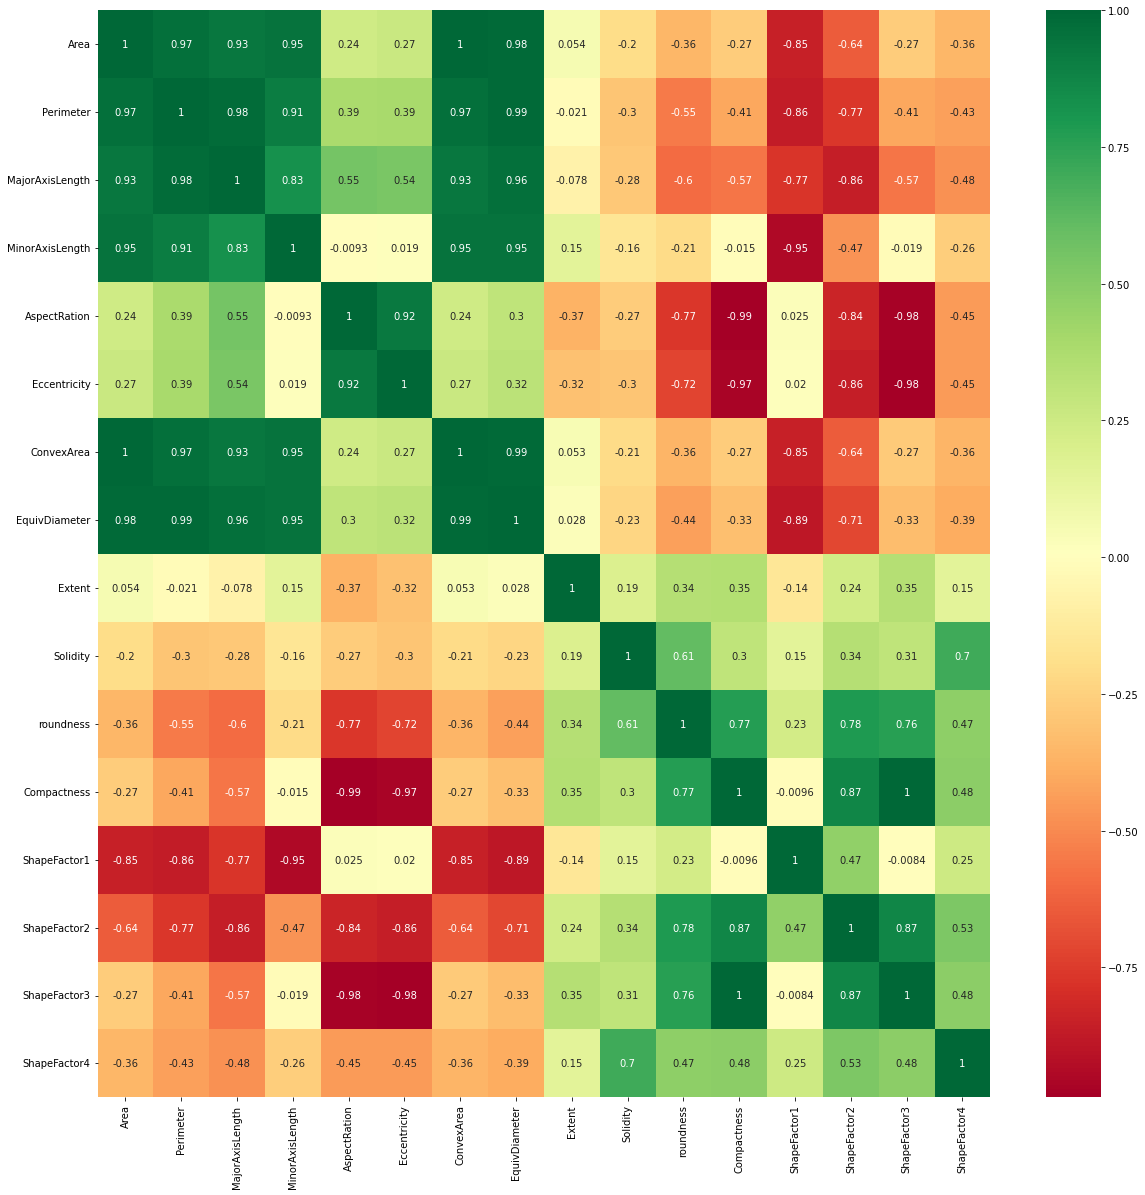

In [9]:
corrmat  = df_tmp.corr()
#Correlation plot
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df_tmp[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<Figure size 2880x2880 with 0 Axes>

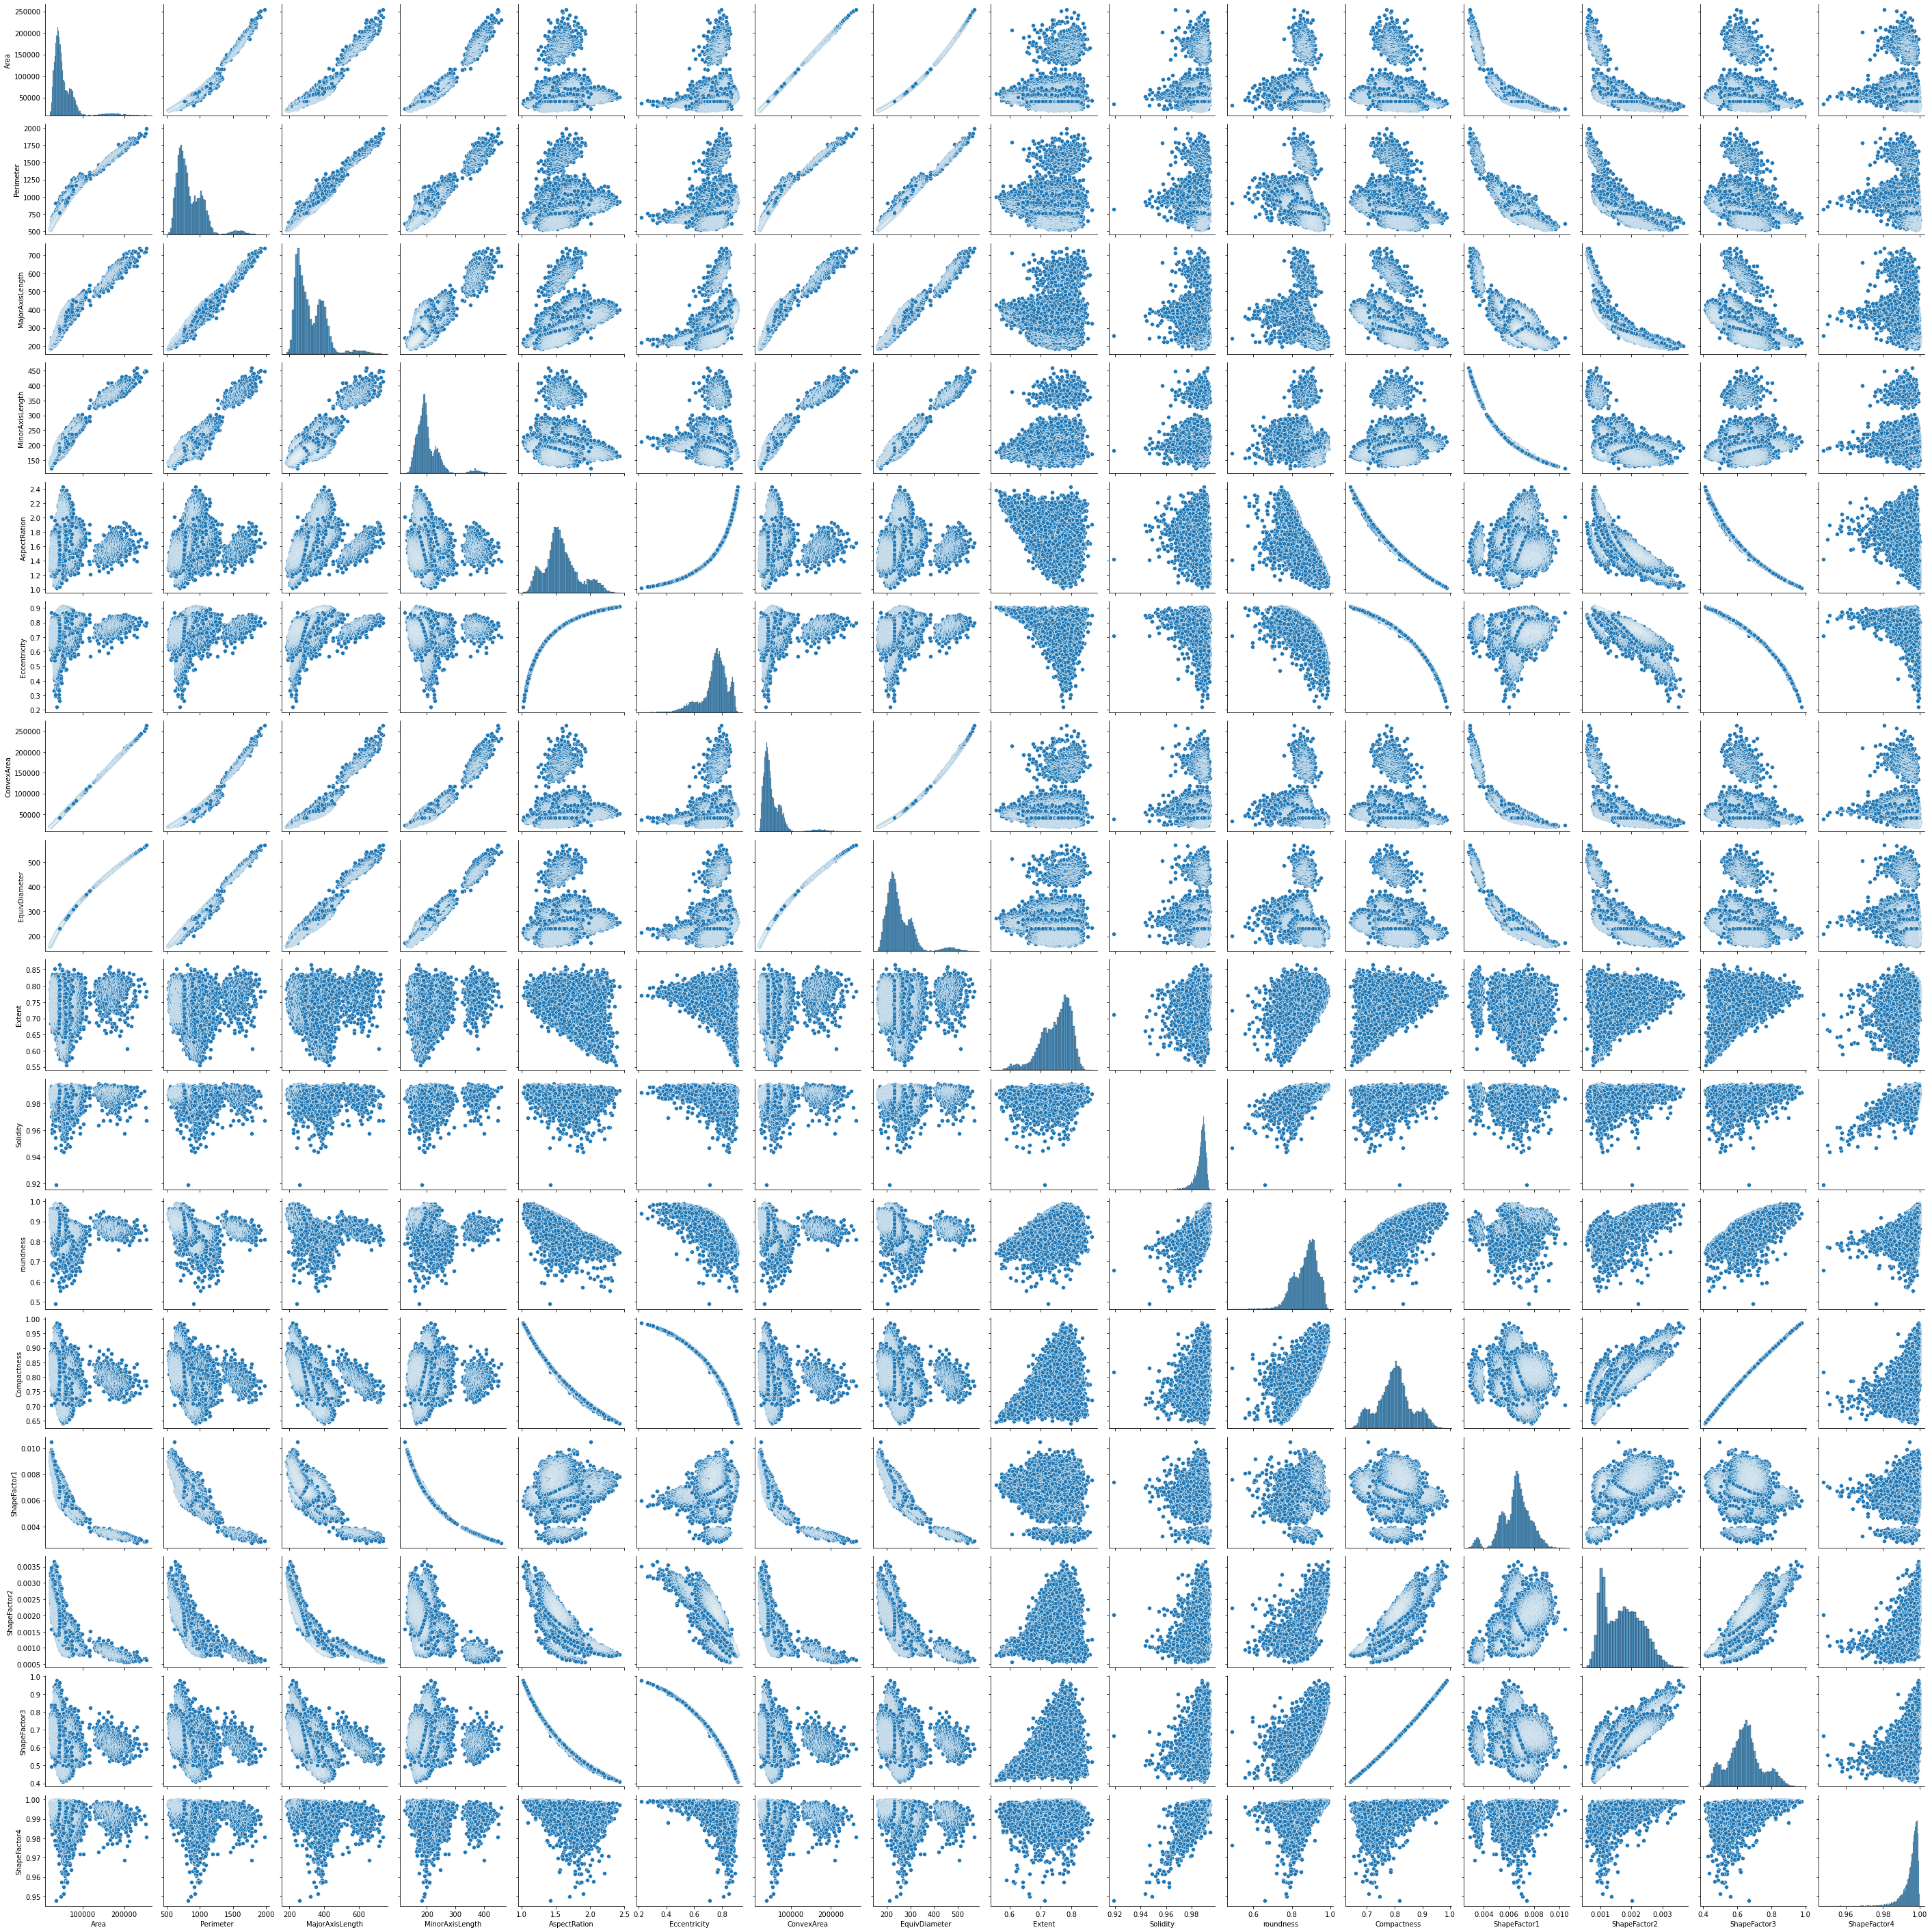

In [10]:
plt.figure(figsize = (40,40))

sns.pairplot(data=df_tmp)

It is clearly visible that there is multicollinearity between the features

### Feature Engineering

#### Removing Unnecessary Data columns

In [11]:
df_root.drop(columns= ["Bean ID"],inplace=True)

#### NUll or Missing values

In [12]:
df_root.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    2
MinorAxisLength    3
AspectRation       1
Eccentricity       2
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           3
roundness          0
Compactness        4
ShapeFactor1       4
ShapeFactor2       2
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

<b>Number of rows will Null values are less and doesnt effect the distribution of the dataset, we can drop the rows</b>

In [13]:
df_root = df_root.dropna()
print(df_root.shape)
df_root.head()

(13591, 17)


Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
4  30140    620.134       201.847882       190.279279      1.060798   
5  30279    634.927       212.560556       181.510182      1.171067   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   
5      0.520401       30600     196.347702  0.775688  0.989510   0.943852   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER  
5     0.923726      0.007020      0.003153      0.853270      0.999236  SEKER

In [14]:
df_root.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [15]:
df_root.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13591.000000  13591.000000     13591.000000     13591.000000   
mean    53077.569421    855.565981       320.281091       202.292563   
std     29335.656114    214.319365        85.679586        44.999344   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36373.000000    703.897000       253.441135       175.792208   
50%     44674.000000    795.194000       297.079966       192.476741   
75%     61352.000000    977.360500       376.520088       217.124066   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13591.000000  13591.000000   13591.000000   13591.000000  13591.000000   
mean       1.583801      0.751189   53797.983298     253.134391      0.749698   
std        0.246422      0.091731   29786.623118      59.192047      0.049109   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432988      0.716251   36750.000000     215.201166      0.718527   
50%        1.551509      0.764576   45224.000000     238.496758      0.759785   
75%        1.707447      0.810550   62326.500000     279.492026      0.786858   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13591.000000  13591.000000  13591.000000  13591.000000  13591.000000   
mean       0.987141      0.873174      0.799700      0.006563      0.001714   
std        0.004662      0.059491      0.061607      0.001129      0.000595   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985669      0.832015      0.762366      0.005898      0.001153   
50%        0.988282      0.883061      0.801138      0.006644      0.001692   
75%        0.990011      0.916797      0.834010      0.007273      0.002168   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13591.000000  13591.000000  
mean       0.643315      0.995059  
std        0.098800      0.004368  
min        0.410339      0.947687  
25%        0.581202      0.993695  
50%        0.641822      0.996381  
75%        0.695572      0.997877  
max        0.974767      0.999733

#### Dealing with Target feature

In [16]:
#df_tmp = df_root.copy()
dict_Class = {k:v for k, v in zip(list(set(df_root.iloc[:, -1].tolist())),
                                     list(range(len(list(set(df_root.iloc[:, -1].tolist()))))))}
dict_Class

{'HOROZ': 0,
 'BARBUNYA': 1,
 'SEKER': 2,
 'SIRA': 3,
 'BOMBAY': 4,
 'CALI': 5,
 'DERMASON': 6}

In [17]:
df_root["Class"] = df_root["Class"].map(dict_Class)
df_root.head(8)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
4  30140    620.134       201.847882       190.279279      1.060798   
5  30279    634.927       212.560556       181.510182      1.171067   
6  30477    670.033       211.050155       184.039050      1.146768   
8  30685    635.681       213.534145       183.157146      1.165852   
9  30834    631.934       217.227813       180.897469      1.200834   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   
5      0.520401       30600     196.347702  0.775688  0.989510   0.943852   
6      0.489478       30970     196.988633  0.762402  0.984081   0.853080   
8      0.514081       31044     197.659696  0.771561  0.988436   0.954240   
9      0.553642       31120     198.139012  0.783683  0.990810   0.970278   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724      2  
1     0.953861      0.006979      0.003564      0.909851      0.998430      2  
2     0.908774      0.007244      0.003048      0.825871      0.999066      2  
4     0.970516      0.006697      0.003665      0.941900      0.999166      2  
5     0.923726      0.007020      0.003153      0.853270      0.999236      2  
6     0.933374      0.006925      0.003242      0.871186      0.999049      2  
8     0.925658      0.006959      0.003152      0.856844      0.998953      2  
9     0.912125      0.007045      0.003008      0.831973      0.999061      2

In [18]:
set(df_root.Class)

{0, 1, 2, 3, 4, 5, 6}

#### Check Distribution of Features

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')


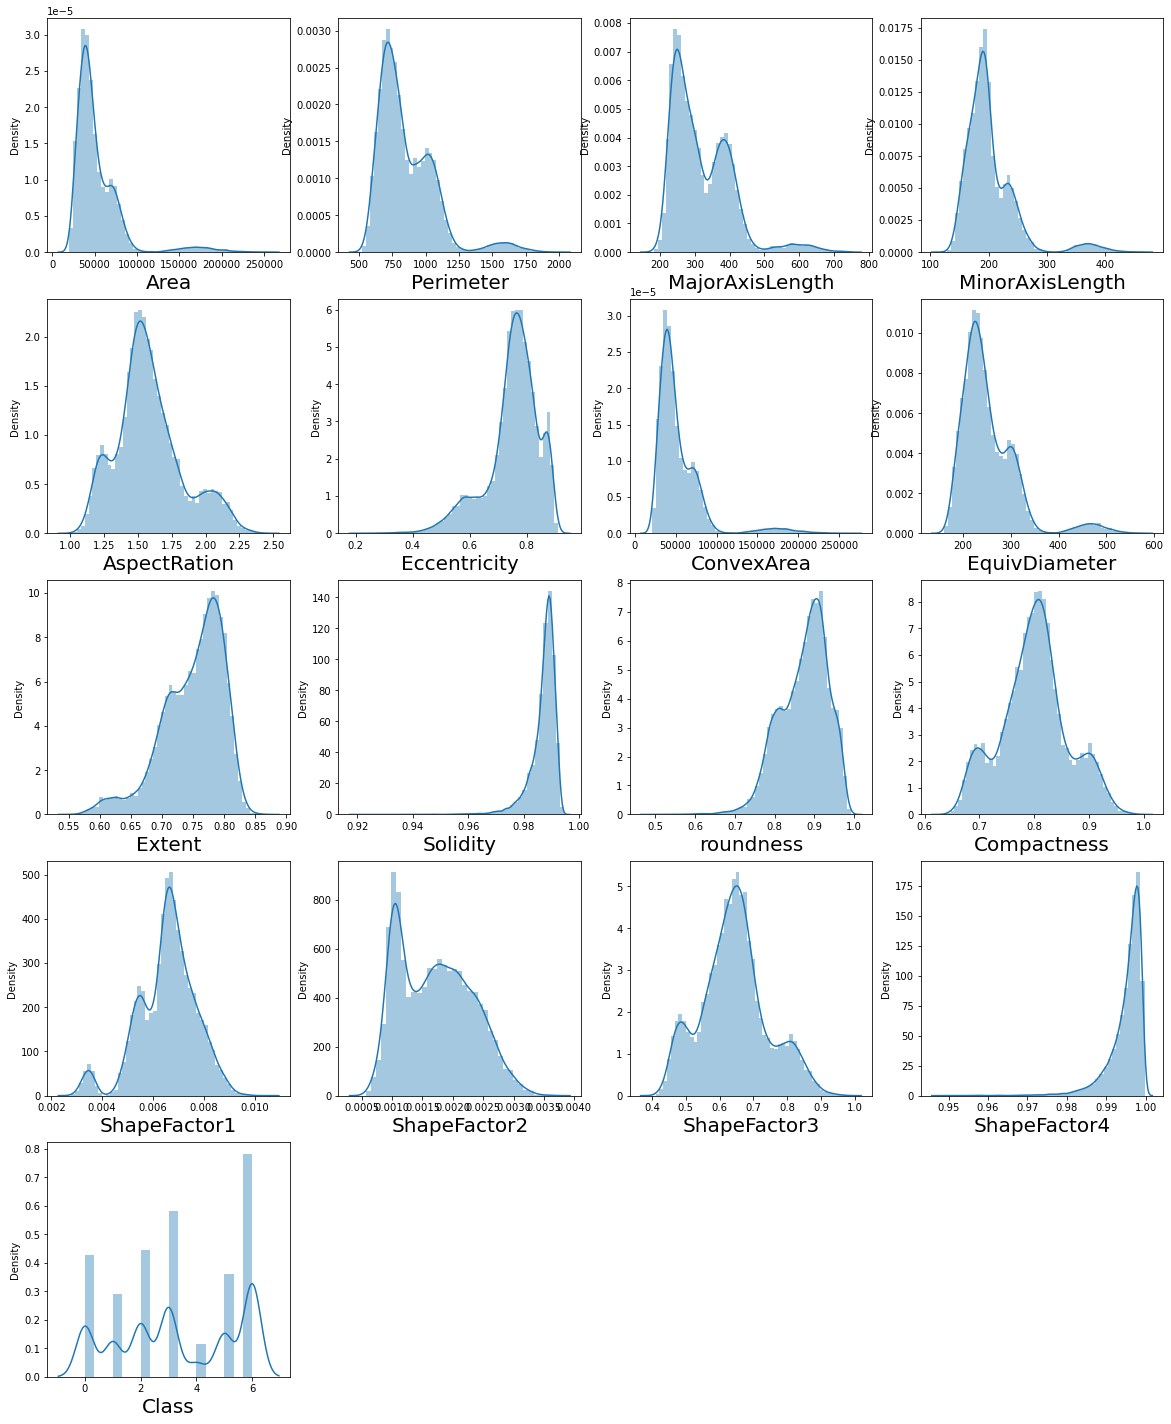

In [19]:
# let's see how data is distributed for every column
df_tmp = df_root.copy()
#df_tmp.drop(columns=['Bean ID'],inplace=True)
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
print(df_tmp.columns)
for column in df_tmp:
    if plotnumber<=18 :
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_tmp[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<b>Most of the columns are normally distributed but some have skewness due to Outliers</b>

In [20]:
print("skewness of each column")
for col in df_root:
    print(col,"->",df_root[col].skew())

skewness of each column
Area -> 2.951255591634598
Perimeter -> 1.6249749765014962
MajorAxisLength -> 1.357668268523544
MinorAxisLength -> 2.2357427157936804
AspectRation -> 0.5840957384901392
Eccentricity -> -1.0656828186476266
ConvexArea -> 2.9401487885739988
EquivDiameter -> 1.9475874509888866
Extent -> -0.8937382041693148
Solidity -> -2.5501567504367912
roundness -> -0.6356652140480243
Compactness -> 0.03596081606550084
ShapeFactor1 -> -0.5328984958350058
ShapeFactor2 -> 0.29964487288934977
ShapeFactor3 -> 0.24173496281589082
ShapeFactor4 -> -2.758829845636853
Class -> -0.07919643570206933


#### Outlier Handling

In [21]:
df_outlier = df_root.drop(columns=["Class"])
df_outlier.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
4  30140    620.134       201.847882       190.279279      1.060798   
5  30279    634.927       212.560556       181.510182      1.171067   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   
5      0.520401       30600     196.347702  0.775688  0.989510   0.943852   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.913358      0.007332      0.003147      0.834222      0.998724  
1     0.953861      0.006979      0.003564      0.909851      0.998430  
2     0.908774      0.007244      0.003048      0.825871      0.999066  
4     0.970516      0.006697      0.003665      0.941900      0.999166  
5     0.923726      0.007020      0.003153      0.853270      0.999236

<b>Checking for outliers</b>

<AxesSubplot:>

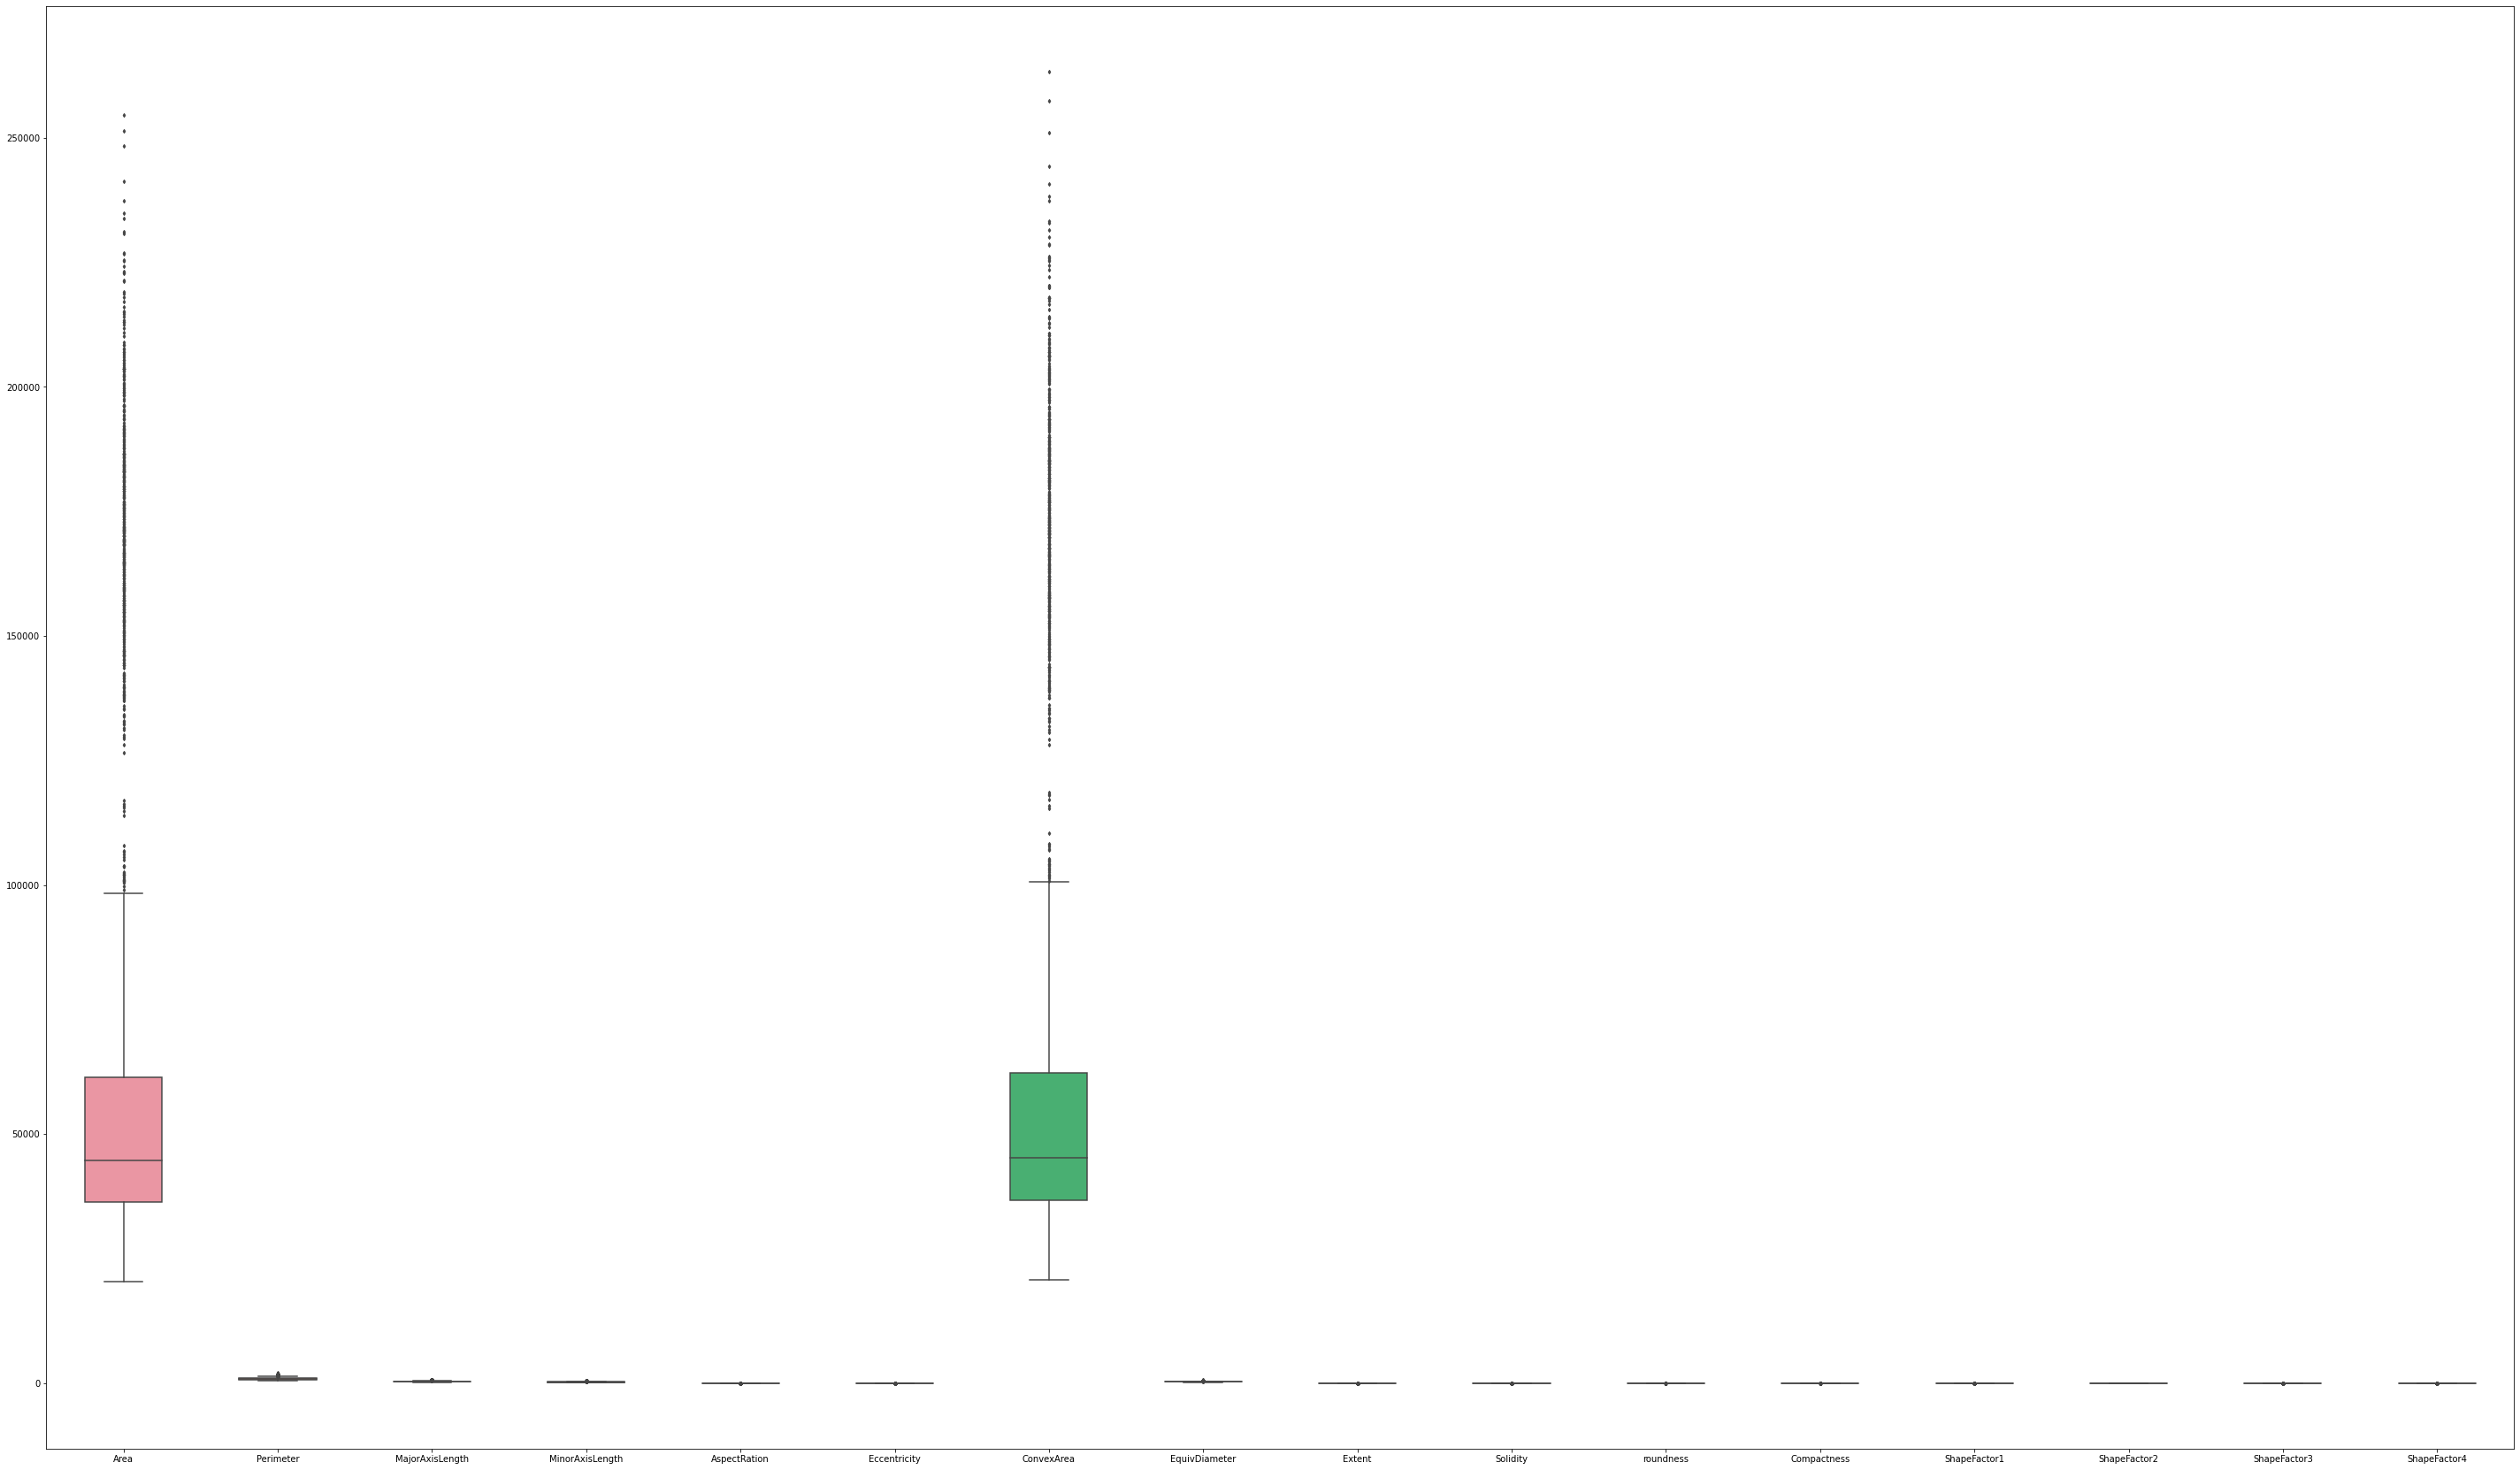

In [22]:
fig, ax = plt.subplots(figsize=(50,30))
sns.boxplot(data=df_outlier, width= 0.5,ax=ax,  fliersize=3)

<p>Many Outliers in the data espically in "Area" and "ConvexArea" columns<br>
Option 1 : Deleting the outlier can cause a data loss of about 3000rows so to avoid that we can use some other method<br>
Option 2 : Replace outlier with boundary of the distribution but as the count of the outlers is huge it will produce skewness in the data<br>
    Option 3 : So we can replace the outliers with the <b>Median</b> as median is not effected by the outliers
</p>

In [23]:
print("skewness of each column after Outlier Handling")
for column in df_outlier.columns:
    Q1= np.percentile(df_outlier[column], 25,interpolation = 'midpoint')
    Q3 = np.percentile(df_outlier[column], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    median = df_outlier[column].quantile(0.50)
    df_outlier[column] = np.where(df_outlier[column] <=(Q1-1.5*IQR), median,df_outlier[column])
    df_outlier[column] = np.where(df_outlier[column] >=(Q3+1.5*IQR), median,df_outlier[column])
    print(column, "->", df_outlier[column].skew())

skewness of each column after Outlier Handling
Area -> 0.8307316808641193
Perimeter -> 0.5972444343605717
MajorAxisLength -> 0.6381489693556291
MinorAxisLength -> 0.563755537978312
AspectRation -> 0.38708340238809047
Eccentricity -> -0.4766498859275242
ConvexArea -> 0.8362281840709223
EquivDiameter -> 0.5576262828876315
Extent -> -0.6504259333743141
Solidity -> -0.7714516405620646
roundness -> -0.42433582580678303
Compactness -> -0.01601212958683773
ShapeFactor1 -> 0.05792896799797322
ShapeFactor2 -> 0.29964487288934977
ShapeFactor3 -> 0.12236241153619266
ShapeFactor4 -> -1.0527209991671123


#### Standardization and Normalization of Features

<b>Standard Scaling</b>

In [24]:
trans = StandardScaler()
data = trans.fit_transform(df_outlier)
df_rootSS = pd.DataFrame(data,columns=df_outlier.columns)

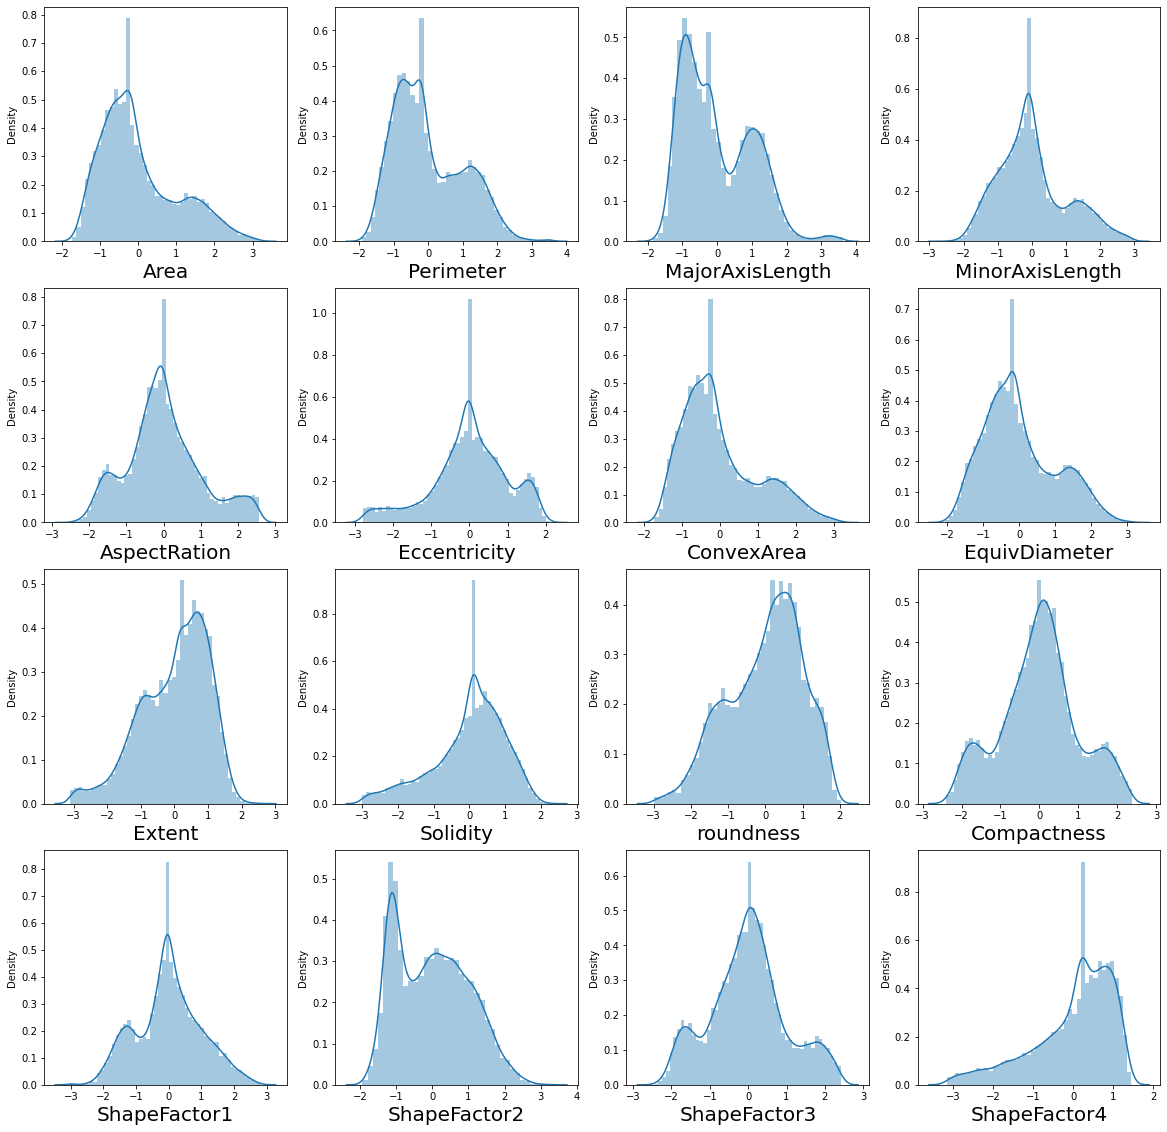

In [25]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in df_rootSS.columns:
    if plotnumber<=18 :
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_rootSS[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<b>Robust Scaling</b>

In [26]:
scalar = RobustScaler()
df_rootRB = pd.DataFrame(scalar.fit_transform(df_outlier))

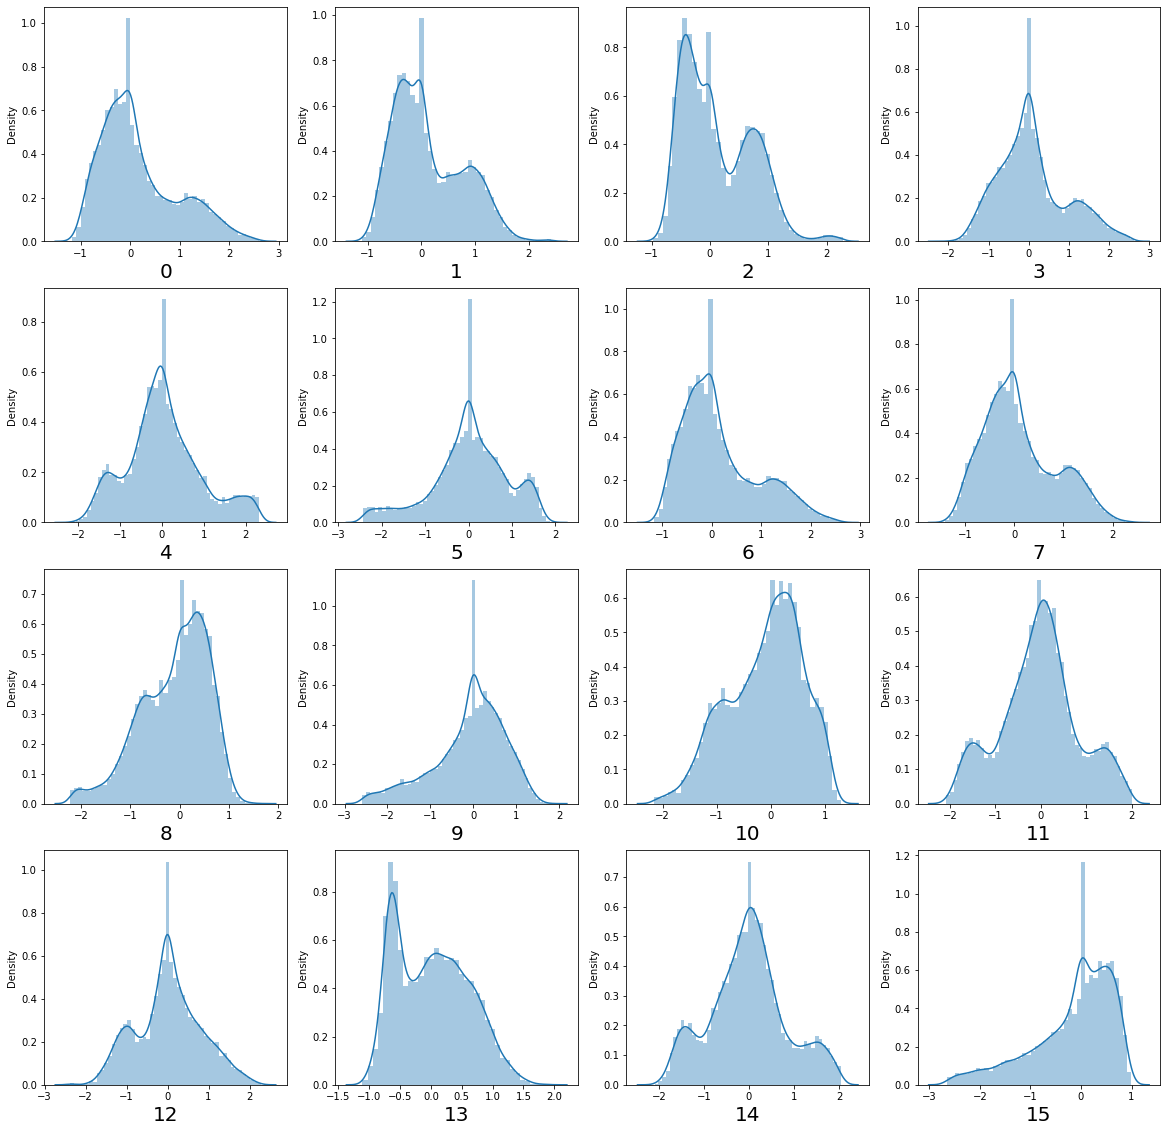

In [27]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in df_rootRB.columns:
    if plotnumber<=18 :
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_rootRB[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [28]:
dict_skew = {
    "Column" : df_rootSS.skew().index,
    "Standard Scaling" : df_rootSS.skew().values,
    "Robust Scaling" : df_rootRB.skew().values
} 
skewness_df = pd.DataFrame(dict_skew)
skewness_df

Column  Standard Scaling  Robust Scaling
0              Area          0.830732        0.830732
1         Perimeter          0.597244        0.597244
2   MajorAxisLength          0.638149        0.638149
3   MinorAxisLength          0.563756        0.563756
4      AspectRation          0.387083        0.387083
5      Eccentricity         -0.476650       -0.476650
6        ConvexArea          0.836228        0.836228
7     EquivDiameter          0.557626        0.557626
8            Extent         -0.650426       -0.650426
9          Solidity         -0.771452       -0.771452
10        roundness         -0.424336       -0.424336
11      Compactness         -0.016012       -0.016012
12     ShapeFactor1          0.057929        0.057929
13     ShapeFactor2          0.299645        0.299645
14     ShapeFactor3          0.122362        0.122362
15     ShapeFactor4         -1.052721       -1.052721

<b>Both Transformation give same results and data is Normally Distributed so no other transformations are required</b>

In [29]:
df_prime = df_rootSS.copy()
df_prime["Class"] = list(df_root["Class"])

### Feature Selection

#### MultiCollinearlity(vif)

In [30]:
def vif_score(x):
    scalar = StandardScaler()
    arr = scalar.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns = ["Features","VIF_Score"])

vif_score(df_prime)

Features    VIF_Score
0              Area   988.478094
1         Perimeter    37.523945
2   MajorAxisLength    10.239527
3   MinorAxisLength    28.694456
4      AspectRation     5.679667
5      Eccentricity     4.444602
6        ConvexArea  1020.796676
7     EquivDiameter   105.810517
8            Extent     1.118626
9          Solidity     1.901592
10        roundness     7.165272
11      Compactness    29.326714
12     ShapeFactor1    22.073451
13     ShapeFactor2    10.540253
14     ShapeFactor3    23.250201
15     ShapeFactor4     1.675231
16            Class     1.698064

In [31]:
df_tmp = df_prime.copy()

In [32]:
df_tmp.drop(columns=['Class'],inplace=True)
vif_score(df_tmp)

Features    VIF_Score
0              Area   987.129191
1         Perimeter    37.507568
2   MajorAxisLength    10.226324
3   MinorAxisLength    28.634145
4      AspectRation     5.676114
5      Eccentricity     4.415332
6        ConvexArea  1014.440900
7     EquivDiameter   105.643845
8            Extent     1.117034
9          Solidity     1.863884
10        roundness     6.125728
11      Compactness    29.099187
12     ShapeFactor1    20.434658
13     ShapeFactor2    10.278319
14     ShapeFactor3    23.203049
15     ShapeFactor4     1.660862

In [33]:
df_tmp.drop(columns=['ConvexArea'],inplace=True)
vif_score(df_tmp)

Features   VIF_Score
0              Area   44.239569
1         Perimeter   37.261501
2   MajorAxisLength   10.226292
3   MinorAxisLength   28.441701
4      AspectRation    5.673256
5      Eccentricity    4.413360
6     EquivDiameter  105.241687
7            Extent    1.116506
8          Solidity    1.830235
9         roundness    6.110601
10      Compactness   29.095556
11     ShapeFactor1   20.242795
12     ShapeFactor2   10.255677
13     ShapeFactor3   23.202849
14     ShapeFactor4    1.660845

In [34]:
df_tmp.drop(columns=['EquivDiameter'],inplace=True)
vif_score(df_tmp)

Features  VIF_Score
0              Area  26.377697
1         Perimeter  30.865171
2   MajorAxisLength  10.133648
3   MinorAxisLength  25.818747
4      AspectRation   5.632993
5      Eccentricity   4.412026
6            Extent   1.116506
7          Solidity   1.821931
8         roundness   6.071027
9       Compactness  28.416524
10     ShapeFactor1  18.196214
11     ShapeFactor2  10.164802
12     ShapeFactor3  23.179403
13     ShapeFactor4   1.660495

In [35]:
df_tmp.drop(columns=['Perimeter'],inplace=True)
vif_score(df_tmp)

Features  VIF_Score
0              Area  20.837077
1   MajorAxisLength   8.639152
2   MinorAxisLength  25.759283
3      AspectRation   5.632554
4      Eccentricity   4.410109
5            Extent   1.114657
6          Solidity   1.821883
7         roundness   4.941783
8       Compactness  28.276408
9      ShapeFactor1  16.614149
10     ShapeFactor2  10.123211
11     ShapeFactor3  23.176231
12     ShapeFactor4   1.659389

In [36]:
df_tmp.drop(columns=['Compactness'],inplace=True)
vif_score(df_tmp)

Features  VIF_Score
0              Area  20.170413
1   MajorAxisLength   8.635127
2   MinorAxisLength  25.306934
3      AspectRation   5.353142
4      Eccentricity   4.392590
5            Extent   1.113670
6          Solidity   1.812668
7         roundness   4.883257
8      ShapeFactor1  16.410663
9      ShapeFactor2   9.602287
10     ShapeFactor3  11.323253
11     ShapeFactor4   1.658743

In [37]:
df_tmp.drop(columns=['MinorAxisLength'],inplace=True)
vif_score(df_tmp)

Features  VIF_Score
0              Area  12.622901
1   MajorAxisLength   8.574261
2      AspectRation   5.305245
3      Eccentricity   4.392573
4            Extent   1.113173
5          Solidity   1.802818
6         roundness   4.869437
7      ShapeFactor1   8.727018
8      ShapeFactor2   9.581197
9      ShapeFactor3  11.006606
10     ShapeFactor4   1.656902

In [38]:
df_tmp.drop(columns=['Area'],inplace=True)
vif_score(df_tmp)

Features  VIF_Score
0  MajorAxisLength   7.322690
1     AspectRation   5.170812
2     Eccentricity   4.387638
3           Extent   1.112438
4         Solidity   1.791607
5        roundness   4.790035
6     ShapeFactor1   3.378236
7     ShapeFactor2   9.444791
8     ShapeFactor3  10.625017
9     ShapeFactor4   1.655286

In [39]:
df_tmp.drop(columns=['ShapeFactor3'],inplace=True)
vif_score(df_tmp)

Features  VIF_Score
0  MajorAxisLength   7.183420
1     AspectRation   4.700802
2     Eccentricity   3.190545
3           Extent   1.111899
4         Solidity   1.781582
5        roundness   4.555491
6     ShapeFactor1   2.768339
7     ShapeFactor2   8.582353
8     ShapeFactor4   1.652437

In [40]:
df_tmp.drop(columns=['ShapeFactor2'],inplace=True)
vif_score(df_tmp)

Features  VIF_Score
0  MajorAxisLength   5.478921
1     AspectRation   3.795605
2     Eccentricity   3.179796
3           Extent   1.108359
4         Solidity   1.744490
5        roundness   4.142303
6     ShapeFactor1   2.766302
7     ShapeFactor4   1.574653

In [41]:
vif_var = vif_score(df_tmp)
colms = (vif_var["Features"].values)
df_prime = df_prime[np.append(colms,"Class")]

In [42]:
df_prime.head()

MajorAxisLength  AspectRation  Eccentricity    Extent  Solidity  roundness  \
0        -1.494114     -1.673551     -0.025058  0.249564  0.300339   1.467362   
1        -1.604958     -2.132047     -0.025058  0.703317 -1.018448   0.217883   
2        -1.426796     -1.616047     -0.025058  0.570786  0.539801   1.288237   
3        -1.585795     -2.299943     -0.025058  0.457261  0.994507   1.939919   
4        -1.430643     -1.793529     -0.025058  0.515899  0.523115   1.217878   

   ShapeFactor1  ShapeFactor4  Class  
0      0.697402      1.072735      2  
1      0.320377      0.962874      2  
2      0.603806      1.200817      2  
3      0.019427      1.238212      2  
4      0.364620      1.264304      2

<b>MultiCollinearily removed</b>

#### HeatMap Correlation

                 MajorAxisLength  AspectRation  Eccentricity    Extent  \
MajorAxisLength         1.000000      0.623954      0.594229 -0.113960   
AspectRation            0.623954      1.000000      0.790845 -0.253065   
Eccentricity            0.594229      0.790845      1.000000 -0.218750   
Extent                 -0.113960     -0.253065     -0.218750  1.000000   
Solidity               -0.291867     -0.292597     -0.254339  0.178352   
roundness              -0.718971     -0.716648     -0.695146  0.254880   
ShapeFactor1           -0.628504     -0.026844     -0.031794 -0.074377   
ShapeFactor4           -0.484125     -0.486231     -0.435788  0.096686   
Class                  -0.364407     -0.202595     -0.273074  0.111716   

                 Solidity  roundness  ShapeFactor1  ShapeFactor4     Class  
MajorAxisLength -0.291867  -0.718971     -0.628504     -0.484125 -0.364407  
AspectRation    -0.292597  -0.716648     -0.026844     -0.486231 -0.202595  
Eccentricity    -0.254339  -

<AxesSubplot:>

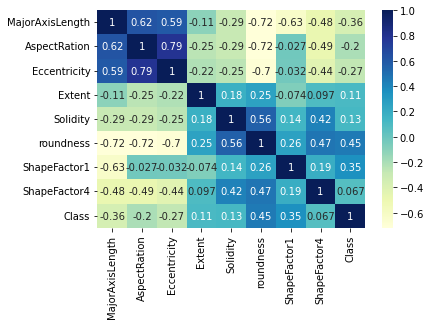

In [43]:
print(df_prime.corr())
sns.heatmap(df_prime.corr(), cmap="YlGnBu", annot=True)

<b>There is no high correlation between features and target variables</b>

#### Principle Component Analysis

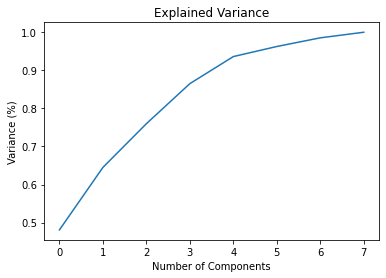

In [44]:
pca = PCA()
principalComponents = pca.fit_transform(df_prime.drop(columns=["Class"]))
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

<p>From the diagram above, it can be seen that 4 principal components explain almost 90% of the variance in data and 6 principal components explain around 95% of the variance in data.
<br>
So, instead of giving all the columns as input, we’d only feed these 5 principal components of the data to the machine learning algorithm and we’d obtain a similar result.</p>

In [45]:
pca = PCA(n_components=5)
new_data = pca.fit_transform(df_prime.drop(columns=["Class"]))
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5'])
principal_Df['Class'] = list(df_prime["Class"])
principal_Df

principal component 1  principal component 2  principal component 3  \
0                  -2.655565              -0.497196               0.148967   
1                  -1.916533              -0.017437               1.229663   
2                  -2.663991              -0.277538              -0.180201   
3                  -3.343154               0.255319              -0.204249   
4                  -2.675149              -0.087268              -0.069893   
...                      ...                    ...                    ...   
13586              -0.958646              -0.624323              -0.386779   
13587              -1.653223               0.543385              -0.924785   
13588              -1.129661              -0.140446               0.005781   
13589              -0.482116              -0.461576               0.769115   
13590              -0.621267              -0.120633              -1.079679   

       principal component 4  principal component 5  Class  
0                   0.136680              -0.270488      2  
1                   0.852133              -1.178407      2  
2                   0.198720              -0.432386      2  
3                  -0.251362              -0.000988      2  
4                   0.050199              -0.487487      2  
...                      ...                    ...    ...  
13586              -1.174194              -0.005368      6  
13587               0.178687              -0.296305      6  
13588              -0.691203               0.427898      6  
13589              -0.613146               0.705906      6  
13590               0.248793              -0.677759      6  

[13591 rows x 6 columns]

In [46]:
principal_Df.to_csv("DataPreprocessing_output1.csv")

#### Split Independent and Dependent Features

In [47]:
X = principal_Df.drop(columns = ["Class"])
y = principal_Df.Class

## Case 1 : 80:20

#### Train Test Split

In [48]:
x_train_c1,x_test_c1,y_train_c1,y_test_c1 = train_test_split(X,y, test_size= 0.20, random_state = 355)

In [49]:
x_train_c1.shape

(10872, 5)

In [50]:
x_test_c1.shape

(2719, 5)

In [51]:
print(y_train_c1.shape)
{ k:list(y_train_c1).count(k) for k in set(y_train_c1)}

(10872,)


{0: 1555, 1: 1068, 2: 1581, 3: 2096, 4: 435, 5: 1291, 6: 2846}

In [52]:
print(y_test_c1.shape)
{ k:list(y_test_c1).count(k) for k in set(y_test_c1)}

(2719,)


{0: 373, 1: 254, 2: 426, 3: 540, 4: 87, 5: 339, 6: 700}

### Model Building

#### Logestic Regression

<p>Need to select parameters as multinormial or OVR(one verses Rest)</p>

In [53]:
lr_model_c1 = LogisticRegression(multi_class='multinomial')
lr_model_c1.fit(x_train_c1,y_train_c1)

LogisticRegression(multi_class='multinomial')

#### MLE

#### Random Forest

Compare LR model with a none Linear Model

In [54]:
rf_classifier_c1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rf_classifier_c1.fit(x_train_c1,y_train_c1)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

## Case 2 : 90:10

#### Train Test Split

In [55]:
x_train_c2,x_test_c2,y_train_c2,y_test_c2 = train_test_split(X,y, test_size= 0.10, random_state = 355)

In [56]:
x_train_c2.shape

(12231, 5)

In [57]:
x_test_c2.shape

(1360, 5)

In [58]:
print(y_train_c2.shape)
{ k:list(y_train_c2).count(k) for k in set(y_train_c2)}

(12231,)


{0: 1750, 1: 1182, 2: 1788, 3: 2374, 4: 475, 5: 1462, 6: 3200}

In [59]:
print(y_test_c2.shape)
{ k:list(y_test_c2).count(k) for k in set(y_test_c2)}

(1360,)


{0: 178, 1: 140, 2: 219, 3: 262, 4: 47, 5: 168, 6: 346}

### Model Building

#### Logestic Regression

<p>Need to select parameters as multinormial or OVR(one verses Rest)</p>

In [60]:
lr_model_c2 = LogisticRegression(multi_class='multinomial')
lr_model_c2.fit(x_train_c2,y_train_c2)

LogisticRegression(multi_class='multinomial')

#### MLE

#### Random Forest

Compare LR model with a none Linear Model

In [61]:
rf_classifier_c2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
rf_classifier_c2.fit(x_train_c2,y_train_c2)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

#### Extra

In [63]:
y_pred = lr_model_c1.predict(x_test_c1)

##### Logestic Regression Evaluation

In [65]:
print("Accuracy Model : ",accuracy_score(y_test_c1,y_pred))
print("Train Accuracy : ",lr_model_c1.score(x_train_c1,y_train_c1))
print("Test Accuracy : ",lr_model_c1.score(x_test_c1,y_test_c1))

Accuracy Model :  0.862449429937477
Train Accuracy :  0.8552244297277409
Test Accuracy :  0.862449429937477


In [66]:
dict_Class

{'HOROZ': 0,
 'BARBUNYA': 1,
 'SEKER': 2,
 'SIRA': 3,
 'BOMBAY': 4,
 'CALI': 5,
 'DERMASON': 6}

In [68]:
print(confusion_matrix(y_test_c1,y_pred,labels=list(dict_Class.values())))
print(classification_report(y_test_c1,y_pred,labels=list(dict_Class.values())))

[[358   1   0   7   0   6   1]
 [  4 210   1   5   1  33   0]
 [  0   0 389  14   2   0  21]
 [ 13   3  15 457   9   3  40]
 [  4   6   0  57   7  13   0]
 [  7  35   1   2   2 292   0]
 [  2   0  20  46   0   0 632]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       373
           1       0.82      0.83      0.83       254
           2       0.91      0.91      0.91       426
           3       0.78      0.85      0.81       540
           4       0.33      0.08      0.13        87
           5       0.84      0.86      0.85       339
           6       0.91      0.90      0.91       700

    accuracy                           0.86      2719
   macro avg       0.79      0.77      0.77      2719
weighted avg       0.85      0.86      0.85      2719



##### Cross Validation

In [69]:
#kfold validation
kfold_validation=KFold(45)
results_kfold = cross_val_score(lr_model_c1,X,y,cv=kfold_validation)
print("K_Fold validation Score : ",np.mean(results_kfold))

K_Fold validation Score :  0.8171061035463371


In [ ]:
'''
#Commented beacuse of cross validation is computationally expensive
skfold=StratifiedKFold(n_splits=5)
leave_validation=LeaveOneOut()
results_skfold = cross_val_score(lr_model_c1,X,y,cv=skfold)
results_leave = cross_val_score(lr_model_c1,X,y,cv=leave_validation)
print("Stratified K validation Score : ",np.mean(results_skfold))
print("Leave One out validation Score : ",np.mean(results_leave))'''